## Whatsapp chat analysis

In [18]:
## importing libraries
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [19]:
# retrieving time and date of chats
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [20]:
## creating dataframe for whatsapp chat analysis
data = []
conversation = 'WhatsApp Chat with Whatsapp chat analysis🤍.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [21]:
## creating dataframe
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())
print(df.Author.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     139 non-null    datetime64[ns]
 1   Time     139 non-null    object        
 2   Author   136 non-null    object        
 3   Message  139 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 4.5+ KB
None
[None 'Ashwinn💫' 'Ayushi']


In [22]:
df.tail(20)

,Date,Time,Author,Message
119,2021-05-19,19:44,Ayushi,So i didn’t did anything yet
120,2021-05-19,19:45,Ayushi,But I’m going now
121,2021-05-19,19:45,Ashwinn💫,Which meeting?
122,2021-05-19,19:45,Ayushi,No
123,2021-05-19,19:45,Ayushi,Internship meeting i will tell uh later
124,2021-05-19,19:45,Ashwinn💫,Even I was chilling and vibing at terracw
125,2021-05-19,19:45,Ayushi,😃same with me
126,2021-05-19,19:46,Ashwinn💫,But you were at meeting🙄
127,2021-05-19,20:43,Ayushi,Ya 🥲
128,2021-05-22,15:46,Ashwinn💫,What project are u doing today


In [23]:
# printing total messgaes
total_messages = df.shape[0]
print(total_messages)

139


In [24]:
# printing total media messages
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

0


In [25]:
# retrieving emoji
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [30]:
# analysing type of data in chats
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Ashwinn💫 and Ayushi")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Ashwinn💫 and Ayushi
Total Messages:  139
Number of Media Shared:  0
Number of Emojis Shared 0
Number of Links Shared 0


In [31]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['Ashwinn💫','Ayushi']
for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
    # req_df will contain messages of only one particular user
    print(f'Stats of {l[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Average Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    #links consist of total links
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)

Stats of Ashwinn💫 -
Messages Sent 66
Average Words per message 6.696969696969697
Media Messages Sent 0
Emojis Sent 0
Links Sent 0
Stats of Ayushi -
Messages Sent 70
Average Words per message 3.342857142857143
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


There are 3689 words in all the messages.


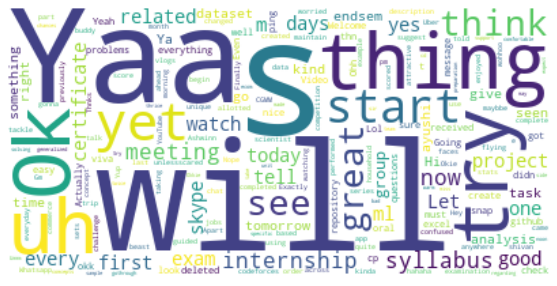

In [32]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Ashwinn💫


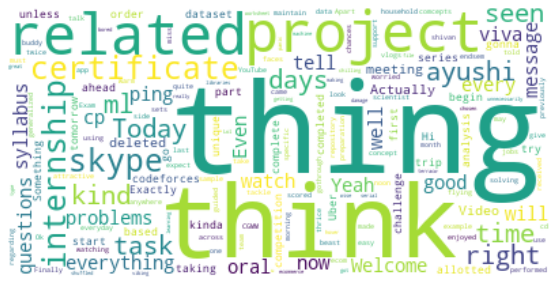

Author name Ayushi


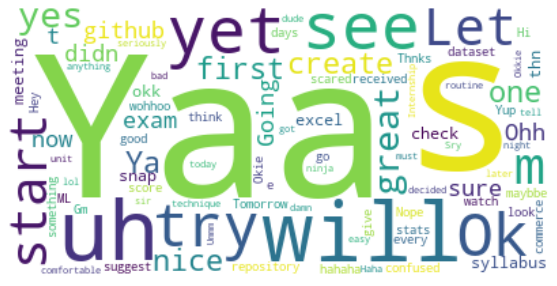

In [33]:
l = ['Ashwinn💫','Ayushi']
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image   
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()